## 1. \IMPORT LIBRARY DAN MOUNT GOOGLE DRIVE

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import warnings
warnings.filterwarnings('ignore')
drive.mount('/content/drive')
print("✅ Libraries imported successfully!")
print("✅ Google Drive mounted successfully!")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Libraries imported successfully!
✅ Google Drive mounted successfully!


## 2. LOAD DATASET

In [17]:
file_path = '/content/supermarket_sales1.csv'
try:
    df = pd.read_csv(file_path)
    print("✅ Dataset loaded successfully!")
except FileNotFoundError:
    print("❌ File not found. Please check the file path.")
    # Alternative: Download dataset directly
    # !wget -O supermarket_sales.csv "https://www.kaggle.com/datasets/akashbommidi/super-market-sales"
    df = pd.read_csv('supermarket_sales1.csv')
print(f"📊 Dataset Shape: {df.shape}")
print(f"📋 Columns: {list(df.columns)}")

✅ Dataset loaded successfully!
📊 Dataset Shape: (1072, 17)
📋 Columns: ['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date', 'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income', 'Rating']


## 3. DATA UNDERSTANDING

In [18]:
# preview data
print("\n📊 DATASET INFO:")
df.info()
print("\n📈 STATISTICAL SUMMARY (NUMERICAL):")
display(df.describe())
print("\n📊 STATISTICAL SUMMARY (CATEGORICAL):")
display(df.describe(include=['object']))


📊 DATASET INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072 entries, 0 to 1071
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1072 non-null   object 
 1   Branch                   1062 non-null   object 
 2   City                     1066 non-null   object 
 3   Customer type            1070 non-null   object 
 4   Gender                   1068 non-null   object 
 5   Product line             1072 non-null   object 
 6   Unit price               1072 non-null   float64
 7   Quantity                 1072 non-null   int64  
 8   Tax 5%                   1072 non-null   float64
 9   Total                    1072 non-null   float64
 10  Date                     1072 non-null   object 
 11  Time                     1072 non-null   object 
 12  Payment                  1072 non-null   object 
 13  cogs                     1072 non-null   float64
 14  gross m

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1.072000e+03,1072.000000,1072.000000
mean,55.978638,5.511194,15.577932,327.136580,311.558647,4.761905e+00,15.577932,6.925840
std,26.367744,2.945167,11.925036,250.425756,238.500720,6.309010e-14,11.925036,1.721597
min,10.080000,1.000000,0.508500,10.678500,10.170000,4.761905e+00,0.508500,4.000000
25%,33.322500,3.000000,5.799750,121.794750,115.995000,4.761905e+00,5.799750,5.500000
50%,56.075000,5.000000,12.236250,256.961250,244.725000,4.761905e+00,12.236250,6.900000
75%,77.772500,8.000000,23.094750,484.989750,461.895000,4.761905e+00,23.094750,8.400000
max,99.960000,10.000000,49.650000,1042.650000,993.000000,4.761905e+00,49.650000,10.000000



📊 STATISTICAL SUMMARY (CATEGORICAL):


,Invoice ID,Branch,City,Customer type,Gender,Product line,Date,Time,Payment
count,1072,1062,1066,1070,1068,1072,1072,1072,1072
unique,1000,4,6,2,2,6,93,506,3
top,347-56-2442,A,Yangon,Normal,Female,Electronic accessories,2/7/2019,11:40,Ewallet
freq,4,364,360,543,534,189,24,11,385


## 4. DATA QUALITY ASSESSMENT

In [19]:
# cek missing values
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_info = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percent
})
display(missing_info[missing_info['Missing Count'] > 0])
# cek data duplicates
print(f"DUPLICATE ROWS: {df.duplicated().sum()}")
# cek tipe data
print("DATA TYPES ANALYSIS:")
print(df.dtypes)

,Missing Count,Missing Percentage
Branch,10,0.932836
City,6,0.559701
Customer type,2,0.186567
Gender,4,0.373134


DUPLICATE ROWS: 72
DATA TYPES ANALYSIS:
Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object


## 5. VISUALISASI DATA QUALITY ASSESSMENT

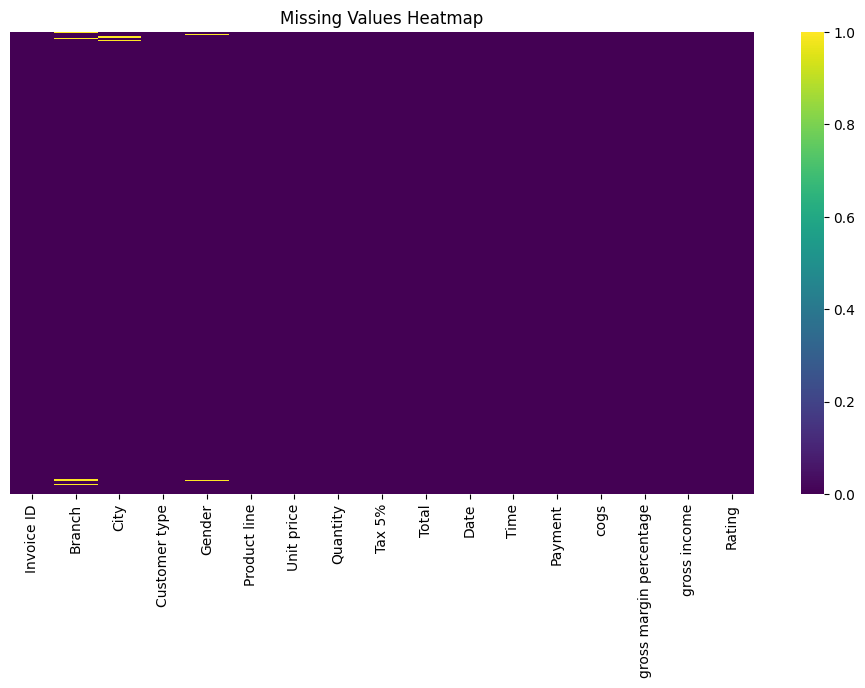

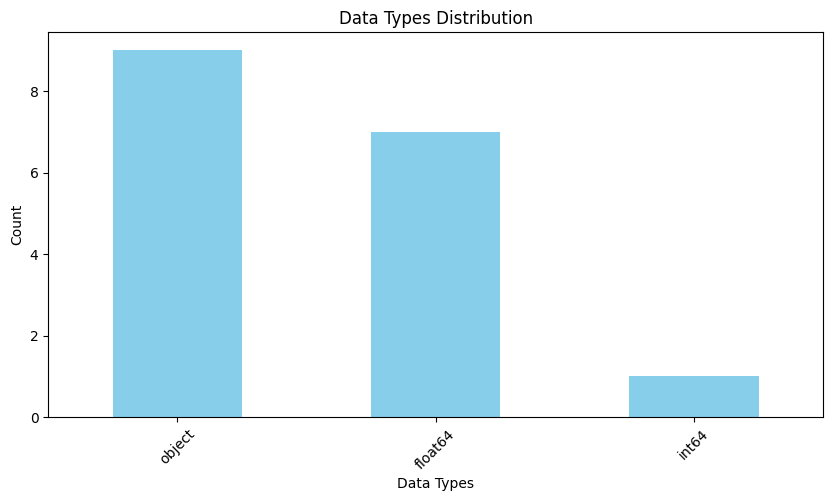

In [20]:
# visualisasi missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()
# distribution Data types
plt.figure(figsize=(10, 5))
df.dtypes.value_counts().plot(kind='bar', color='skyblue')
plt.title('Data Types Distribution')
plt.xlabel('Data Types')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## 6. HANDLING MISSING VALUES

In [21]:
# membuat salinan untuk data cleaning
df_clean = df.copy()
print("📝 BEFORE HANDLING MISSING VALUES:")
print(f"Total missing values: {df_clean.isnull().sum().sum()}")
# handling missing values
for column in df_clean.columns:
    if df_clean[column].isnull().sum() > 0:
        missing_count = df_clean[column].isnull().sum()
        missing_percent = (missing_count / len(df_clean)) * 100
        print(f"📌 Column: {column}")
        print(f"   Missing values: {missing_count} ({missing_percent:.2f}%)")
        # kolom numerik yg kosong diisi dengan median
        if df_clean[column].dtype in ['int64', 'float64']:
            fill_value = df_clean[column].median()
            df_clean[column].fillna(fill_value, inplace=True)
            print(f"   ✅ Filled with median: {fill_value}")
               # kolom kategorial diisi dengan modus
        elif df_clean[column].dtype == 'object':
            fill_value = df_clean[column].mode()[0] if not df_clean[column].mode().empty else 'Unknown'
            df_clean[column].fillna(fill_value, inplace=True)
            print(f"   ✅ Filled with mode: {fill_value}")
print(f"\n📝 AFTER HANDLING MISSING VALUES:")
print(f"Total missing values: {df_clean.isnull().sum().sum()}")

📝 BEFORE HANDLING MISSING VALUES:
Total missing values: 22
📌 Column: Branch
   Missing values: 10 (0.93%)
   ✅ Filled with mode: A
📌 Column: City
   Missing values: 6 (0.56%)
   ✅ Filled with mode: Yangon
📌 Column: Customer type
   Missing values: 2 (0.19%)
   ✅ Filled with mode: Normal
📌 Column: Gender
   Missing values: 4 (0.37%)
   ✅ Filled with mode: Female

📝 AFTER HANDLING MISSING VALUES:
Total missing values: 0


## 7. DATA TYPE CORRECTION

In [22]:
# Convert date columns if they exist
date_columns = ['Date', 'Time', 'Invoice Date']
for col in date_columns:
    if col in df_clean.columns:
        try:
            if col == 'Time':
                df_clean[col] = pd.to_datetime(df_clean[col], format='%H:%M').dt.time
            else:
                df_clean[col] = pd.to_datetime(df_clean[col])
            print(f"✅ Converted {col} to datetime")
        except Exception as e:
            print(f"❌ Could not convert {col}: {e}")
# Convert categorical columns to proper category type
categorical_columns = ['Gender', 'Product line', 'City', 'Customer type', 'Payment']
for col in categorical_columns:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].astype('category')
        print(f"✅ Converted {col} to category")
print("\n📝 AFTER DATA TYPE CORRECTION:")
print(df_clean.dtypes)

❌ Could not convert Date: time data "3/3/201" doesn't match format "%m/%d/%Y", at position 2. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.
✅ Converted Time to datetime
✅ Converted Gender to category
✅ Converted Product line to category
✅ Converted City to category
✅ Converted Customer type to category
✅ Converted Payment to category

📝 AFTER DATA TYPE CORRECTION:
Invoice ID                   object
Branch                       object
City                       category
Customer type              category
Gender                     category
Product line               category
Unit price                  float64
Quantity                      int64
Tax 5%                      float64
Total     

## 8. DATA STANDARDIZATION

In [23]:
# Standardize text columns (remove extra spaces, proper case)
text_columns = ['Gender', 'Product line', 'City', 'Customer type', 'Payment']
for col in text_columns:
    if col in df_clean.columns:
        print(f"\n📌 Before standardization - {col}:")
        print(f"   Unique values: {df_clean[col].unique()}")
        # Remove extra spaces and standardize case
        df_clean[col] = df_clean[col].str.strip().str.title()
        print(f"📌 After standardization - {col}:")
        print(f"   Unique values: {df_clean[col].unique()}")
# Standardize numerical columns (round decimals if needed)
numerical_columns = ['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross income', 'Rating']
for col in numerical_columns:
    if col in df_clean.columns:
        if df_clean[col].dtype in ['float64']:
            df_clean[col] = df_clean[col].round(2)
            print(f"✅ Rounded {col} to 2 decimal places")


📌 Before standardization - Gender:
   Unique values: ['Female', 'Male']
Categories (2, object): ['Female', 'Male']
📌 After standardization - Gender:
   Unique values: ['Female' 'Male']

📌 Before standardization - Product line:
   Unique values: ['Health and beauty', 'Electronic accessories', 'Home and lifestyle', 'Sports and travel', 'Food and beverages', 'Fashion accessories']
Categories (6, object): ['Electronic accessories', 'Fashion accessories', 'Food and beverages',
                         'Health and beauty', 'Home and lifestyle', 'Sports and travel']
📌 After standardization - Product line:
   Unique values: ['Health And Beauty' 'Electronic Accessories' 'Home And Lifestyle'
 'Sports And Travel' 'Food And Beverages' 'Fashion Accessories']

📌 Before standardization - City:
   Unique values: ['Yangon', 'Naypyitaw', 'yangon', 'naypyitaw', 'Mandalay', 'mandalay']
Categories (6, object): ['Mandalay', 'Naypyitaw', 'Yangon', 'mandalay', 'naypyitaw', 'yangon']
📌 After standardization -

## 10. OUTLIER DETECTION AND HANDLING

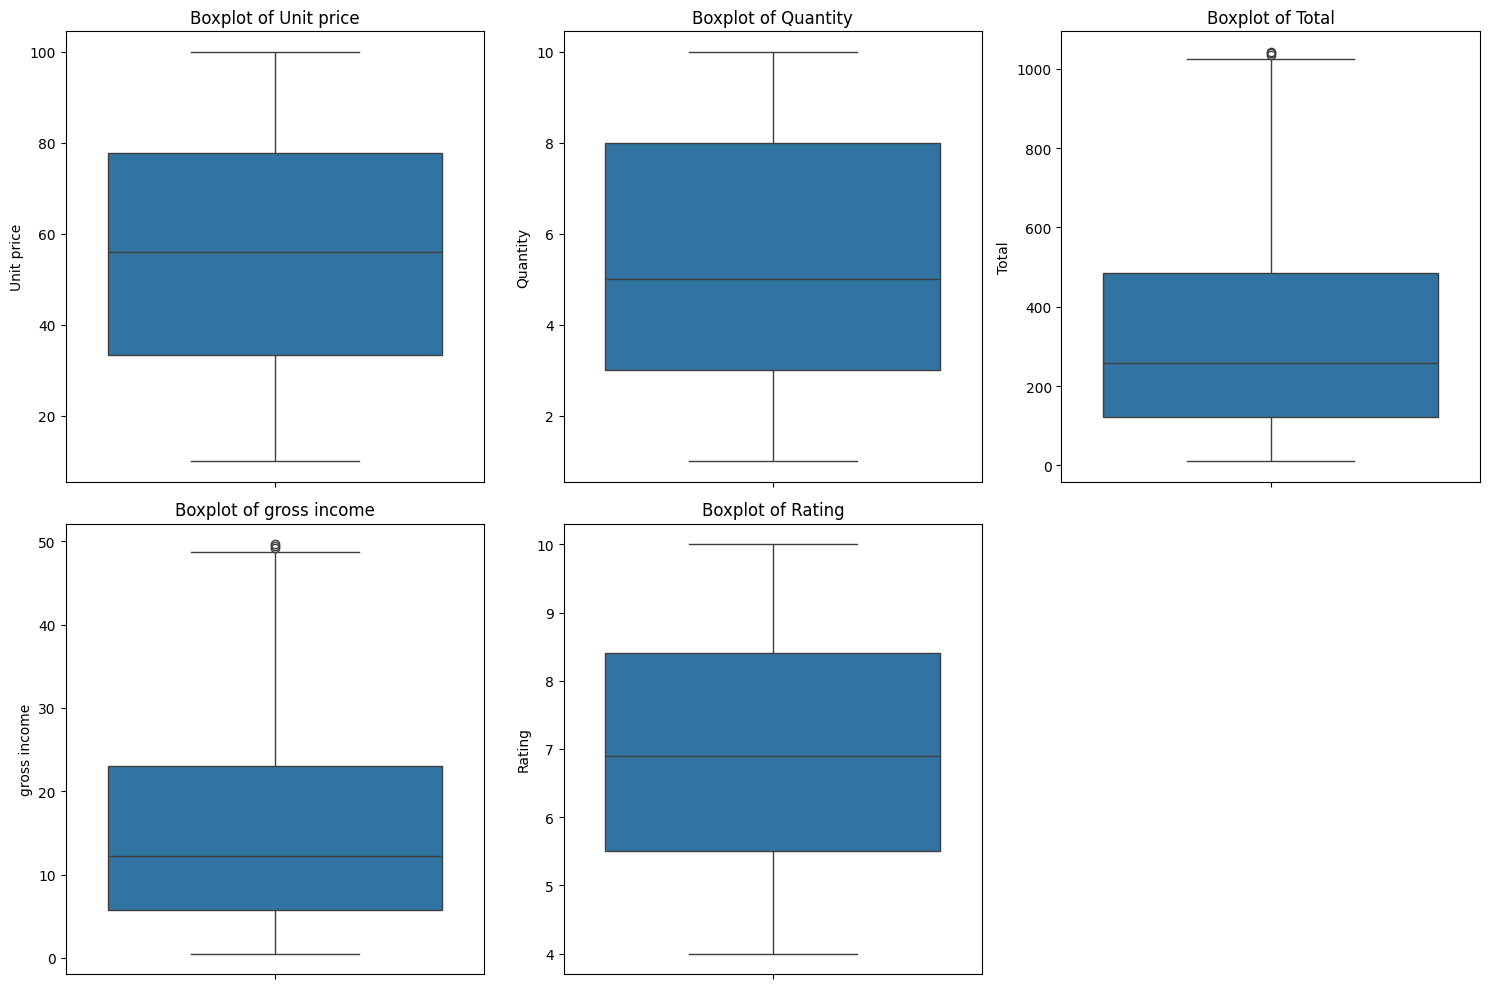


🔍 OUTLIER ANALYSIS (IQR METHOD):
📌 Unit price:
Lower bound: 33.32, Upper bound: 33.32
Outliers: 1072 (100.00%)
📌 Quantity:
Lower bound: 3.00, Upper bound: 3.00
Outliers: 979 (91.32%)
📌 Total:
Lower bound: 121.79, Upper bound: 121.79
Outliers: 1072 (100.00%)
📌 gross income:
Lower bound: 5.80, Upper bound: 5.80
Outliers: 1072 (100.00%)
📌 Rating:
Lower bound: 5.50, Upper bound: 5.50
Outliers: 1053 (98.23%)


In [24]:
# Select numerical columns for outlier analysis
numerical_for_outliers = ['Unit price', 'Quantity', 'Total', 'gross income', 'Rating']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_for_outliers, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df_clean[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()
# Outlier detection using IQR method
print("\n🔍 OUTLIER ANALYSIS (IQR METHOD):")
for col in numerical_for_outliers:
    if col in df_clean.columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.25)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)]
        outlier_percentage = (len(outliers) / len(df_clean)) * 100
        print(f"📌 {col}:")
        print(f"Lower bound: {lower_bound:.2f}, Upper bound: {upper_bound:.2f}")
        print(f"Outliers: {len(outliers)} ({outlier_percentage:.2f}%)")

## 11. DATA VALIDATION AND QUALITY CHECK

In [25]:
# cek Data validation
validation_checks = []
# cek tidak ada missing values
validation_checks.append(("No missing values", df_clean.isnull().sum().sum() == 0))
# cek tidak ada data duplicates
validation_checks.append(("No duplicate rows", df_clean.duplicated().sum() == 0))
# cek tipe data sudah sesuai
date_cols_present = any(col in df_clean.columns for col in date_columns)
if date_cols_present:
    date_cols_correct = all(pd.api.types.is_datetime64_any_dtype(df_clean[col])
                           for col in date_columns if col in df_clean.columns)
    validation_checks.append(("Date columns properly formatted", date_cols_correct))
# Check Numerical values in reasonable range
if 'Quantity' in df_clean.columns:
    quantity_valid = (df_clean['Quantity'] >= 0).all()
    validation_checks.append(("Quantity values are positive", quantity_valid))
if 'Total' in df_clean.columns:
    total_valid = (df_clean['Total'] >= 0).all()
    validation_checks.append(("Total values are positive", total_valid))
# Display validation results
print("🔍 DATA VALIDATION RESULTS:")
for check, result in validation_checks:
    status = "✅ PASS" if result else "❌ FAIL"
    print(f"   {status} - {check}")
# Final data quality summary
print(f"\n📊 FINAL DATA QUALITY SUMMARY:")
print(f"Original dataset shape: {df.shape}")
print(f"Cleaned dataset shape: {df_clean.shape}")
print(f"Missing values: {df_clean.isnull().sum().sum()}")
print(f"Duplicate rows: {df_clean.duplicated().sum()}")
print(f"Memory usage: {df_clean.memory_usage(deep=True).sum() / 1024 ** 2:.2f} MB")

🔍 DATA VALIDATION RESULTS:
   ✅ PASS - No missing values
   ❌ FAIL - No duplicate rows
   ❌ FAIL - Date columns properly formatted
   ✅ PASS - Quantity values are positive
   ✅ PASS - Total values are positive

📊 FINAL DATA QUALITY SUMMARY:
Original dataset shape: (1072, 17)
Cleaned dataset shape: (1072, 17)
Missing values: 0
Duplicate rows: 72
Memory usage: 0.58 MB


## 12. SAVE CLEANED DATASET

In [26]:
# Save cleaned dataset
output_path = '/content/supermarket_sales_cleaned.csv'
df_clean.to_csv(output_path, index=False)
print(f"✅ Cleaned dataset saved to: {output_path}")
print(f"📁 File size: {len(df_clean) / 1000:.1f}K rows")

✅ Cleaned dataset saved to: /content/supermarket_sales_cleaned.csv
📁 File size: 1.1K rows
